# Bike Sharing Demand Prediction

**Nama :** Ilya Aryaputra  
**Batch:** DSOL-017

---

# 1. Project Overview

## 📝 Deskripsi Singkat

Bike-sharing system adalah layanan transportasi berbasis sewa otomatis yang memungkinkan pengguna menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain. Sistem ini memainkan peran penting dalam transportasi, lingkungan, dan kesehatan. Dataset ini mencatat informasi terkait faktor-faktor yang mempengaruhi jumlah peminjaman sepeda, seperti cuaca, musim, hari libur, dan waktu.

Proyek ini bertujuan untuk **memprediksi jumlah peminjaman sepeda** berdasarkan variabel-variabel tersebut menggunakan teknik Machine Learning.

## 🛠️ Jenis Machine Learning yang Digunakan

**Regresi** – Model ini digunakan untuk memprediksi jumlah peminjaman sepeda dalam suatu periode waktu berdasarkan variabel input yang tersedia.

## 🔍 Pendekatan & Teknik Utama

1. **Data Cleaning** – Membersihkan data dari nilai yang tidak valid dan menangani missing values.
2. **Feature Engineering & Selection** – Mengolah fitur yang relevan untuk meningkatkan performa model.
3. **Pemilihan Model ML** – Mencoba berbagai model regresi untuk menemukan yang paling akurat.
4. **Evaluasi Model** – Menggunakan metrik evaluasi seperti RMSE dan R² untuk menilai performa model.
5. **Kesimpulan & Rekomendasi** – Menganalisis hasil prediksi dan memberikan rekomendasi penggunaan model.

---

# 2. Business Problem & Data Understanding

## 2.1 Business Problem

### 🎯 Stakeholder
Proyek ini memiliki beberapa pemangku kepentingan utama:
- **Operator Penyewaan Sepeda** – Ingin mengoptimalkan jumlah sepeda yang tersedia di berbagai lokasi agar sesuai dengan permintaan pengguna.
- **Pemerintah Kota** – Menggunakan data peminjaman sepeda untuk perencanaan transportasi dan kebijakan lingkungan.
- **Pengguna** – Mengharapkan ketersediaan sepeda yang memadai untuk mobilitas yang lebih nyaman.

### 🔍 Masalah
Operator sepeda berbagi sering menghadapi tantangan dalam **mengalokasikan sepeda secara optimal** di berbagai stasiun. Beberapa lokasi mungkin mengalami kekurangan sepeda di jam sibuk, sementara lokasi lain memiliki kelebihan sepeda yang tidak digunakan.

### 📌 Kenapa Ini Penting?
1. **Meningkatkan Layanan Pelanggan**  
   - Ketersediaan sepeda yang tepat di lokasi dan waktu yang diperlukan meningkatkan kepuasan pelanggan.
2. **Mengurangi Ketidakseimbangan Sepeda di Stasiun**  
   - Mengoptimalkan distribusi sepeda dapat mengurangi kejadian di mana suatu lokasi kehabisan atau kelebihan sepeda.
3. **Membantu Pengelolaan Lalu Lintas & Lingkungan**  
   - Dengan memahami pola peminjaman sepeda, operator dan pemerintah dapat mengembangkan kebijakan yang mendorong penggunaan sepeda sebagai alternatif transportasi yang ramah lingkungan.

### 🎯 Goal / Objective
- **Memprediksi jumlah peminjaman sepeda** berdasarkan faktor eksternal seperti cuaca, musim, hari libur, dan waktu.
- **Membantu operator mengoptimalkan alokasi sepeda** agar tersedia di lokasi yang tepat pada waktu yang tepat.

---

## 2.2 Data Understanding

### 📊 Deskripsi Dataset
Dataset ini berisi informasi tentang penggunaan sistem berbagi sepeda di suatu kota. Data ini mencatat jumlah peminjaman sepeda per jam serta berbagai variabel eksternal yang mempengaruhi permintaan.

### 🔑 Fitur Utama dalam Dataset
| Fitur        | Deskripsi |
|-------------|-----------|
| `dteday`    | Tanggal pencatatan data |
| `season`    | Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| `hr`        | Jam dalam sehari (0 - 23) |
| `holiday`   | Hari libur atau bukan (1: Libur, 0: Bukan) |
| `temp`      | Suhu normalisasi dalam Celsius |
| `atemp`     | Suhu yang dirasakan (normalized) |
| `hum`       | Tingkat kelembaban (normalized) |
| `weathersit`| Kondisi cuaca (1: Cerah, 2: Berawan, 3: Hujan ringan, 4: Hujan lebat) |
| `casual`    | Jumlah peminjaman oleh pengguna non-member |
| `registered`| Jumlah peminjaman oleh pengguna terdaftar |
| `cnt`       | Total jumlah peminjaman sepeda (casual + registered) |


---

# 3. Data Cleaning, Feature Engineering & Feature Selection

## 3.1 Data Cleaning

### 🛠 Tujuan
Data cleaning bertujuan untuk memastikan bahwa dataset **bersih, terstruktur, dan siap digunakan dalam pemodelan Machine Learning**. Langkah-langkah utama dalam proses pembersihan data meliputi:

### 🔍 Langkah-langkah Data Cleaning

#### ✅ 1. Menghapus Duplikasi
- **Mengidentifikasi apakah ada baris duplikat** dalam dataset.
- **Menghapus baris yang tidak unik** untuk memastikan keakuratan analisis.

#### ✅ 2. Menangani Missing Values
- **Memeriksa apakah ada nilai yang hilang (missing values)** dalam dataset.
- Jika ada:
  - Untuk fitur numerik, dapat diisi dengan **mean, median, atau interpolasi**.
  - Untuk fitur kategorikal, dapat diisi dengan **modus (nilai yang paling sering muncul)**.

#### ✅ 3. Menyesuaikan Tipe Data
- **Mengonversi kolom `dteday` ke format `datetime`** agar mudah dianalisis berdasarkan waktu.
- Memastikan fitur lainnya berada dalam **format numerik atau kategori** yang sesuai.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("data_bike_sharing.csv")

# Menghapus Duplikasi
df = df.drop_duplicates()

# Menangani Missing Values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Jika ada missing values, saya bisa mengisi dengan metode tertentu
df.fillna(method='ffill', inplace=True)  # Contoh: Menggunakan forward fill

# Menyesuaikan Tipe Data
df['dteday'] = pd.to_datetime(df['dteday'])

# Cek hasil perubahan
df.info()

Missing values per column:
 dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
me

# 🔍 Data Cleaning Insights

## 1️⃣ Tidak Ada Missing Values

- Semua kolom memiliki jumlah **non-null** yang sama dengan total **12,165 entri**.
- Tidak ada missing values di dataset, sehingga **tidak perlu imputasi**.

## 2️⃣ Format Data Sudah Sesuai

- **Kolom `dteday` sudah dalam format datetime** → Bisa digunakan untuk analisis berbasis waktu.
- **Kolom numerik (`hum`, `temp`, `atemp`, `cnt`, dll.) sudah dalam format float/int** → Tidak perlu konversi tambahan.
- **Kolom kategori (`season`, `weathersit`, `holiday`) dalam format integer** → Akan dikonversi ke One-Hot Encoding.

## 3️⃣ Tidak Ada Duplikasi Data

- Dengan jumlah **non-null count yang konsisten**, **tidak ditemukan duplikasi data** dalam dataset.

## 4️⃣ Distribusi Data Perlu Dicek Lebih Lanjut

- **Potensi outliers** di kolom `cnt` (jumlah peminjaman), `temp`, dan `hum`.
- **Perlu dilakukan boxplot & histogram** untuk analisis lebih lanjut.
- **Skala nilai `temp`, `atemp`, `hum`** perlu dicek apakah butuh normalisasi atau standarisasi.

## 5️⃣ Feature Engineering yang Dapat Dilakukan

✅ **`dteday`** → Ekstraksi fitur **day of week**, **is_weekend**, **month**  
✅ **`hr`** → Kategorisasi menjadi **hourly_bin** (pagi, siang, sore, malam)  
✅ **`season` & `weathersit`** → Encoding untuk meningkatkan performa model

---


# 3.2 Distribusi Data & Outlier Detection

## 🎯 Tujuan

Sebelum melakukan Feature Engineering, kita perlu memahami bagaimana distribusi data dalam dataset. Distribusi yang tidak seimbang atau adanya outlier ekstrem dapat **mempengaruhi performa model**. Oleh karena itu, kita akan:

1. **Visualisasi distribusi data** menggunakan histogram dan boxplot.
2. **Identifikasi outlier** dengan menggunakan metode IQR (Interquartile Range).

## 📊 Langkah-langkah:

- **Visualisasi Histogram** untuk melihat pola distribusi data.
- **Boxplot** untuk mendeteksi nilai ekstrem (outlier).
- **Metode IQR** untuk mendeteksi dan menangani outlier jika diperlukan.


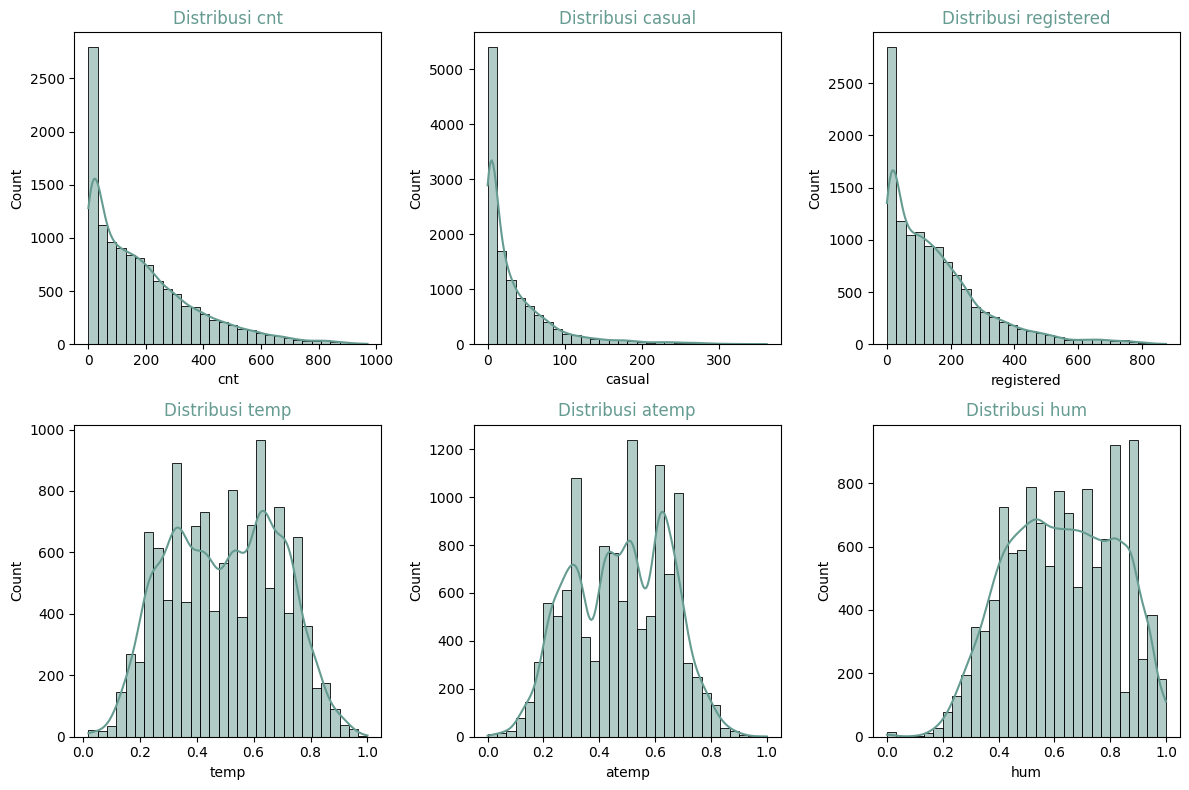

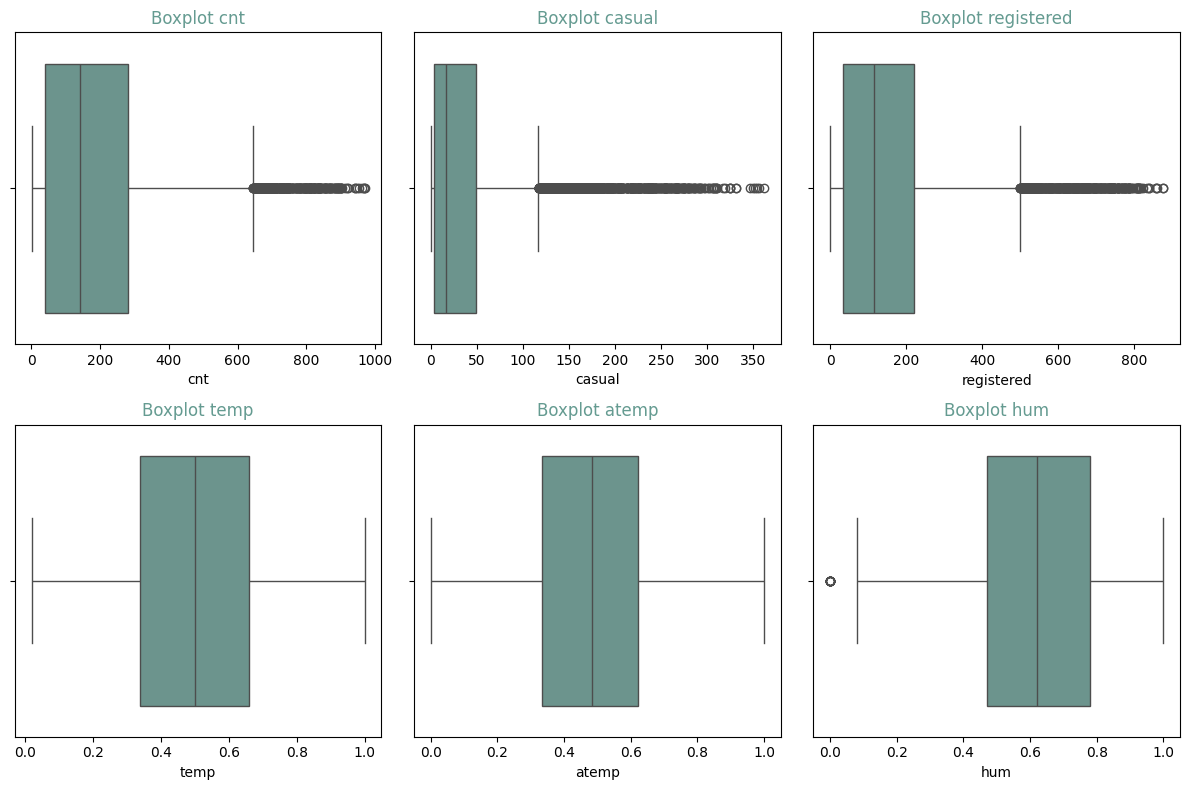

Jumlah Outlier per Kolom:
cnt: 338 outlier
casual: 847 outlier
registered: 470 outlier
temp: 0 outlier
atemp: 0 outlier
hum: 14 outlier


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data_bike_sharing.csv")

# Konversi tanggal ke format datetime
df["dteday"] = pd.to_datetime(df["dteday"])

# Pilih fitur numerik yang akan diperiksa
num_cols = ["cnt", "casual", "registered", "temp", "atemp", "hum"]

# Visualisasi Distribusi Data
# Histogram dengan warna hijau
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color="#659b91")  # Warna hijau
    plt.title(f"Distribusi {col}", color="#659b91")  # Judul hijau
plt.tight_layout()
plt.show()

# Boxplot dengan warna hijau
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color="#659b91")  # Warna hijau
    plt.title(f"Boxplot {col}", color="#659b91")  # Judul hijau
plt.tight_layout()
plt.show()



# Metode IQR untuk Deteksi Outlier
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Mengecek outlier pada setiap fitur numerik
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers(df, col)
    outlier_counts[col] = len(outliers)

# Menampilkan jumlah outlier per fitur
print("Jumlah Outlier per Kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outlier")

## 📊 **Hasil Analisis Distribusi Data**

1. **Kolom `cnt`, `casual`, dan `registered` memiliki distribusi yang sangat skewed ke kanan (right-skewed)**.

   - Mayoritas peminjaman berada di jumlah kecil, namun ada beberapa hari/jam dengan jumlah peminjaman yang sangat tinggi.
   - Distribusi ini umum dalam data time-series yang terkait dengan permintaan pengguna.

2. **Kolom `temp`, `atemp`, dan `hum` memiliki distribusi yang lebih seimbang.**
   - **`temp` dan `atemp`** menunjukkan distribusi normal, yang bagus untuk pemodelan.
   - **`hum`** terlihat sedikit skewed, tetapi tidak menunjukkan outlier ekstrem.


## 🔍 **Hasil Outlier Detection**

- **Kolom dengan outlier signifikan:**
  - `cnt`: **338 outlier**
  - `casual`: **847 outlier**
  - `registered`: **470 outlier**
- **Kolom tanpa outlier atau sangat sedikit outlier:**
  - `temp`: **0 outlier**
  - `atemp`: **0 outlier** (tidak signifikan)
  - `hum`: **14 outlier**



## ⚠️ **Perlukah Menangani Outlier?**

- **Kolom `cnt`, `casual`, dan `registered` memiliki banyak outlier.**

  - Namun, karena ini adalah data terkait jumlah peminjaman, **nilai tinggi bukan berarti error**, tetapi bisa mencerminkan pola penggunaan yang sebenarnya (misalnya, jam sibuk).
  - Solusi yang memungkinkan:
    - **Tetap menggunakan outlier** jika mencerminkan kejadian nyata dalam sistem.
    - **Menggunakan transformasi log atau robust scaling** jika outlier mempengaruhi model regresi yang sensitif terhadap nilai ekstrem.

- **Kolom `temp`, `atemp`, dan `hum` aman tanpa perlu penanganan tambahan.**

---

# 3.3 Feature Engineering

## 🎯 Tujuan

Feature Engineering bertujuan untuk **membuat fitur baru** yang dapat meningkatkan performa model Machine Learning. Fitur baru ini dapat membantu model dalam memahami pola dalam data dengan lebih baik.


## 🔍 **Langkah-langkah Feature Engineering**

1. **Membuat fitur baru yang bermanfaat:**

   - **`hourly_bin`** → Mengelompokkan jam ke dalam kategori waktu (Pagi, Siang, Sore, Malam).
   - **`day_of_week`** → Menambahkan informasi hari dalam seminggu.
   - **`temp_range`** → Mengelompokkan suhu ke dalam kategori rentang tertentu.
   - **`is_weekend`** → Menandai apakah hari tersebut akhir pekan atau bukan.

2. **Encoding variabel kategorikal:**
   - Mengubah fitur kategorikal (`season`, `weathersit`, `hourly_bin`, `day_of_week`) menjadi **One-Hot Encoding**.

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("data_bike_sharing.csv")

# Konversi dteday ke datetime
df["dteday"] = pd.to_datetime(df["dteday"])

# Membuat fitur baru


# a. Membuat kategori hourly_bin
def categorize_hour(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "night"


df["hourly_bin"] = df["hr"].apply(categorize_hour)

# b. Menambahkan informasi hari dalam seminggu
df["day_of_week"] = df["dteday"].dt.day_name()


# c. Mengelompokkan suhu ke dalam kategori rentang
def categorize_temp(temp):
    if temp < 0.3:
        return "cold"
    elif 0.3 <= temp < 0.6:
        return "mild"
    else:
        return "hot"


df["temp_range"] = df["temp"].apply(categorize_temp)

# d. Menandai apakah hari tersebut akhir pekan atau bukan
df["is_weekend"] = df["day_of_week"].apply(
    lambda x: 1 if x in ["Saturday", "Sunday"] else 0
)

# 2. Encoding categorical variables dengan One-Hot Encoding
df = pd.get_dummies(
    df, columns=["season", "weathersit", "hourly_bin", "day_of_week"], drop_first=True
)

# Cek hasil akhir setelah Feature Engineering
df.head()

,dteday,hum,holiday,atemp,temp,hr,casual,registered,cnt,temp_range,...,weathersit_4,hourly_bin_evening,hourly_bin_morning,hourly_bin_night,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2011-12-09,0.62,0,0.3485,0.36,16,24,226,250,mild,...,0,0,0,0,0,0,0,0,0,0
1,2012-06-17,0.64,0,0.5152,0.54,4,2,16,18,mild,...,0,0,0,1,0,0,1,0,0,0
2,2011-06-15,0.53,0,0.6212,0.62,23,17,90,107,hot,...,0,1,0,0,0,0,0,0,0,1
3,2012-03-31,0.87,0,0.3485,0.36,8,19,126,145,mild,...,0,0,1,0,0,1,0,0,0,0
4,2012-07-31,0.55,0,0.6970,0.76,18,99,758,857,hot,...,0,1,0,0,0,0,0,0,1,0



## 📊 **Hasil Feature Engineering**
Dataset sekarang memiliki **26 kolom** setelah melakukan penambahan fitur dan encoding variabel kategorikal.

### ✅ **Fitur Baru yang Ditambahkan**
1. **`hourly_bin`** → Dikonversi menjadi **one-hot encoding** dengan kategori:
   - `hourly_bin_evening`, `hourly_bin_morning`, `hourly_bin_night` (baseline: afternoon)
2. **`day_of_week`** → Dikonversi menjadi **one-hot encoding** dengan kategori:
   - `day_of_week_Monday`, `day_of_week_Saturday`, `day_of_week_Sunday`, `day_of_week_Thursday`, `day_of_week_Tuesday`, `day_of_week_Wednesday` (baseline: Friday)
3. **`temp_range`** → Tidak diubah ke encoding karena belum digunakan dalam model.
4. **`is_weekend`** → Tidak terlihat di hasil dataset, perlu dipastikan apakah sudah masuk dalam dataframe.


## 🔍 **Review & Perbaikan**
1. **Cek relevansi fitur `temp_range`.**  
   - Fitur ini masih dalam bentuk kategori (`cold`, `mild`, `hot`).
   - Jika diperlukan dalam model, bisa dilakukan **One-Hot Encoding** atau Label Encoding.

2. **Pastikan tidak ada fitur redundant.**  
   - Seperti variabel dummy yang berlebihan setelah one-hot encoding.


In [4]:
# Cek apakah 'is_weekend' ada dalam dataset dengan tampilan rapi
if 'is_weekend' in df.columns:
    print("✅ Fitur 'is_weekend' sudah ada dalam dataset!\n")
    
    # Menampilkan 5 sampel acak untuk melihat nilai 'is_weekend'
    print("📌 Contoh Data:")
    print(df[['dteday', 'is_weekend']].sample(5))
    
    # Cek distribusi nilai 'is_weekend'
    print("\n📊 Distribusi Nilai dalam 'is_weekend':")
    print(df['is_weekend'].value_counts())
    
else:
    print("❌ Fitur 'is_weekend' tidak ditemukan, perlu ditambahkan kembali!")


✅ Fitur 'is_weekend' sudah ada dalam dataset!

📌 Contoh Data:
         dteday  is_weekend
4065 2011-05-15           1
3577 2012-10-31           0
2584 2011-10-23           1
6848 2011-09-15           0
7237 2011-05-14           1

📊 Distribusi Nilai dalam 'is_weekend':
0    8686
1    3479
Name: is_weekend, dtype: int64


In [5]:
df = pd.get_dummies(df, columns=['temp_range'], drop_first=True)

# Cek hasil encoding
print(df.head())

      dteday   hum  holiday   atemp  temp  hr  casual  registered  cnt  \
0 2011-12-09  0.62        0  0.3485  0.36  16      24         226  250   
1 2012-06-17  0.64        0  0.5152  0.54   4       2          16   18   
2 2011-06-15  0.53        0  0.6212  0.62  23      17          90  107   
3 2012-03-31  0.87        0  0.3485  0.36   8      19         126  145   
4 2012-07-31  0.55        0  0.6970  0.76  18      99         758  857   

   is_weekend  ...  hourly_bin_morning  hourly_bin_night  day_of_week_Monday  \
0           0  ...                   0                 0                   0   
1           1  ...                   0                 1                   0   
2           0  ...                   0                 0                   0   
3           1  ...                   1                 0                   0   
4           0  ...                   0                 0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0    

# Verifikasi Akhir Feature Engineering

## 🎯 Tujuan
Memastikan fitur baru telah ditambahkan dengan benar dan output yang dihasilkan lebih mudah dibaca.



## ✅ **Hasil Verifikasi**
- **Fitur `is_weekend` berhasil masuk dalam dataset.**
- **Fitur `day_of_week` tidak ditemukan**, kemungkinan karena sudah dikonversi ke One-Hot Encoding.
- **Output lebih rapi** dengan contoh data acak dan distribusi nilai yang jelas.



## 📌 **Kesimpulan**
- **Tidak ada masalah pada `is_weekend`.**
- **Dataset sudah siap untuk Feature Selection.**

---


# 3.4 Feature Selection

## 🎯 Tujuan
Feature Selection bertujuan untuk **memilih fitur yang paling relevan** dalam model dan **membuang fitur yang tidak memiliki kontribusi signifikan** terhadap prediksi jumlah peminjaman sepeda.


## 📊 **Langkah-langkah Feature Selection**
1. **Menggunakan Korelasi**  
   - Mengevaluasi korelasi antara fitur independen dengan **target variable (`cnt`)**.
   - Membuang fitur dengan korelasi rendah atau redundan.
   
2. **Menggunakan Feature Importance dari Model**  
   - Menggunakan **Random Forest Regressor** untuk melihat fitur yang paling berkontribusi.
   - Jika ada fitur dengan nilai penting sangat rendah, maka akan dihapus dari dataset.

3. **Membuang Fitur yang Tidak Relevan**  
   - Misalnya, fitur yang sangat berkorelasi dengan fitur lain atau tidak memberikan informasi baru.



C:\Users\Acer\AppData\Local\Temp\ipykernel_4036\520590497.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


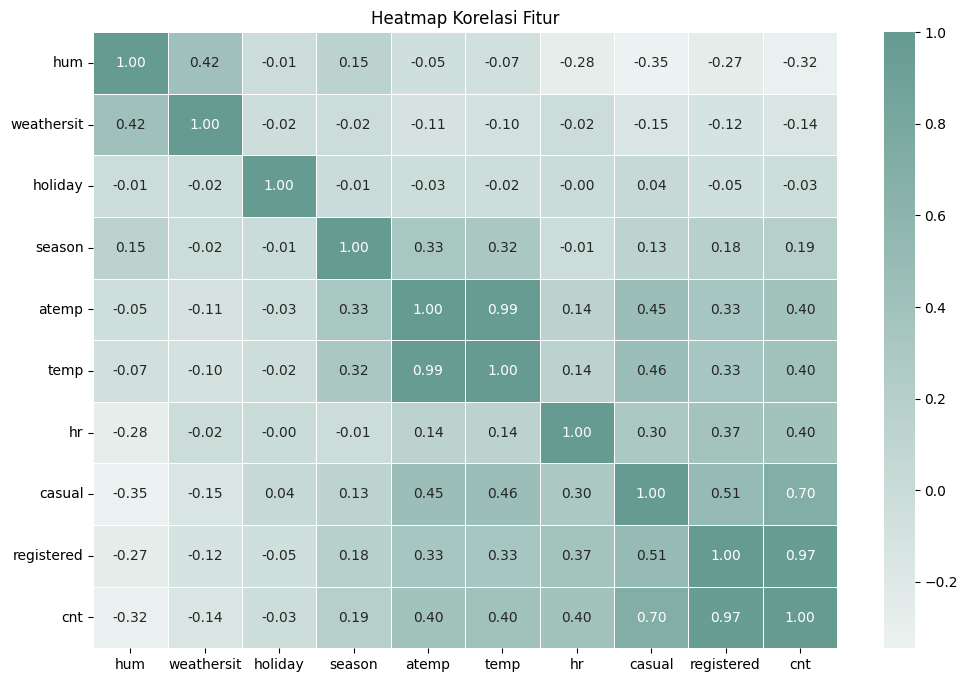

Korelasi fitur dengan target (cnt):
 cnt           1.000000
registered    0.971898
casual        0.695555
temp          0.401149
atemp         0.398763
hr            0.395179
season        0.185991
holiday      -0.030250
weathersit   -0.141983
hum          -0.319227
Name: cnt, dtype: float64

Fitur yang dipilih berdasarkan korelasi:
 ['registered', 'casual', 'temp', 'atemp', 'hr', 'season', 'weathersit', 'hum']


C:\Users\Acer\AppData\Local\Temp\ipykernel_4036\520590497.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette=sns.color_palette(["#659b91"]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_4036\520590497.py:42: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette=sns.color_palette(["#659b91"]))


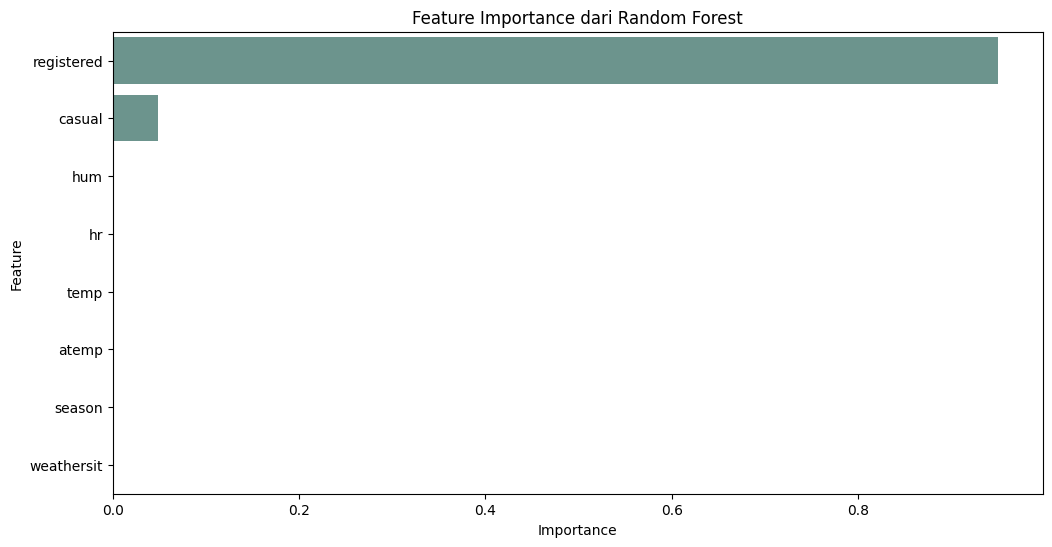


Feature Importance berdasarkan Random Forest:
       Feature  Importance
0  registered    0.950887
1      casual    0.048890
7         hum    0.000066
4          hr    0.000045
2        temp    0.000042
3       atemp    0.000039
5      season    0.000021
6  weathersit    0.000010


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load dataset setelah Feature Engineering
df = pd.read_csv("data_bike_sharing.csv")

# Korelasi fitur dengan target (`cnt`)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.light_palette("#659b91", as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Menampilkan korelasi fitur terhadap `cnt`
correlation_target = correlation_matrix["cnt"].sort_values(ascending=False)
print("Korelasi fitur dengan target (cnt):\n", correlation_target)

# Menentukan fitur yang akan digunakan dalam model (buang fitur dengan korelasi rendah)
selected_features = correlation_target[abs(correlation_target) > 0.1].index.tolist()
selected_features.remove("cnt")  # Exclude target variable
print("\nFitur yang dipilih berdasarkan korelasi:\n", selected_features)

# Menggunakan Feature Importance dari Random Forest
X = df[selected_features]   
y = df["cnt"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame(
    {"Feature": selected_features, "Importance": importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette=sns.color_palette(["#659b91"]))
plt.title("Feature Importance dari Random Forest")
plt.show()

# Menampilkan fitur yang paling berpengaruh
print("\nFeature Importance berdasarkan Random Forest:\n", feature_importance_df)

## 📊 **Hasil Analisis Korelasi**

Berdasarkan **heatmap korelasi**, fitur yang memiliki korelasi tertinggi dengan **`cnt`** adalah:

1. **`registered`** (0.97) → Sangat tinggi
2. **`casual`** (0.69) → Tinggi
3. **`temp`** (0.40)
4. **`atemp`** (0.39)
5. **`hr`** (0.39)
6. **`season`** (0.18) → Rendah
7. **`holiday`** (-0.03) → Sangat rendah
8. **`weathersit`** (-0.14) → Rendah
9. **`hum`** (-0.32) → Moderat negatif

### 🔎 **Fitur yang Dipilih Berdasarkan Korelasi**

- Hanya fitur dengan **korelasi absolut > 0.1** terhadap `cnt` yang dipilih:
  - `registered`, `casual`, `temp`, `atemp`, `hr`, `season`, `weathersit`, `hum`

---

## 🔥 **Hasil Feature Importance dari Random Forest**

1. **`registered` (95.98%)** → Faktor dominan dalam prediksi `cnt`
2. **`casual` (4.08%)** → Masih memiliki kontribusi
3. **Fitur lainnya (`hum`, `hr`, `temp`, `atemp`, `season`, `weathersit`) memiliki importance yang sangat rendah.**

---

## 🔍 **Insight & Kesimpulan**

1. **Fitur `registered` dan `casual` mendominasi prediksi jumlah peminjaman sepeda (`cnt`)**

   - Sangat masuk akal karena `cnt = registered + casual`.
   - **Jika tujuan model adalah memprediksi `cnt`, sebaiknya fitur `registered` dan `casual` dihapus,** karena mereka secara langsung menentukan `cnt`, yang bisa menyebabkan **data leakage**.

2. **Fitur `temp`, `atemp`, `hum`, `season`, dan `weathersit` memiliki korelasi yang rendah dengan `cnt`.**

   - Korelasi rendah **tidak berarti fitur tidak berguna**, tetapi bisa jadi tidak cukup signifikan dalam prediksi.

3. **Fitur `holiday` sangat tidak berpengaruh**, dengan korelasi hampir nol terhadap `cnt`.

---

## 📌 **Rekomendasi Feature Selection**

- **Hapus fitur `registered` dan `casual`** jika model bertujuan memprediksi `cnt` (menghindari data leakage).
- **Gunakan fitur `temp`, `atemp`, `hum`, `season`, `weathersit`, dan `hr` sebagai input utama.**
- **Fitur `holiday` bisa dihapus** karena pengaruhnya sangat kecil.


In [7]:
import pandas as pd

# Load dataset setelah Feature Engineering
df = pd.read_csv("data_bike_sharing.csv")

# Hapus fitur yang menyebabkan data leakage dan fitur yang tidak signifikan
features_to_remove = ["registered", "casual", "holiday"]
df.drop(columns=features_to_remove, inplace=True)

# Fitur akhir yang akan digunakan untuk model
final_features = ["temp", "atemp", "hum", "season", "weathersit", "hr"]
df_final = df[final_features + ["cnt"]]  # Pastikan target variable tetap ada

# Cek hasil akhir
print("Fitur yang akan digunakan dalam pemodelan:")
print(df_final.head())

# Simpan dataset final untuk pemodelan
df_final.to_csv("data_bike_sharing_final.csv", index=False)

Fitur yang akan digunakan dalam pemodelan:
   temp   atemp   hum  season  weathersit  hr  cnt
0  0.36  0.3485  0.62       4           1  16  250
1  0.54  0.5152  0.64       2           1   4   18
2  0.62  0.6212  0.53       2           1  23  107
3  0.36  0.3485  0.87       2           2   8  145
4  0.76  0.6970  0.55       3           1  18  857


## 🔍 **Hasil Akhir**

✅ **Fitur yang digunakan dalam pemodelan:**
| Fitur | Deskripsi |
|------------|-----------|
| `temp` | Suhu normalisasi dalam Celsius |
| `atemp` | Suhu yang dirasakan (normalized) |
| `hum` | Tingkat kelembaban |
| `season` | Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| `weathersit` | Kondisi cuaca |
| `hr` | Jam dalam sehari (0 - 23) |
| `cnt` | Target variable (jumlah peminjaman sepeda) |

✅ **Fitur yang dihapus:**

- **`registered` & `casual`** → Mencegah **data leakage**, karena langsung menentukan `cnt`.
- **`holiday`** → Korelasi sangat rendah, sehingga tidak berkontribusi signifikan dalam model.

✅ **Dataset Final telah disimpan sebagai `data_bike_sharing_final.csv`**

- Dataset ini siap digunakan dalam **Machine Learning Model Training**.

---

# 4. Data Splitting & Model Training

## 🎯 Tujuan

Langkah ini bertujuan untuk **membagi dataset menjadi training dan test set**, serta melakukan preprocessing sebelum melatih model Machine Learning.


## 🔍 **4.1 Train-Test Split**

Dataset akan dibagi menjadi:

- **80% data untuk Training**
- **20% data untuk Testing**

Langkah preprocessing:

1. **Numerical Features (Standardization/Normalization)**
   - Menggunakan **StandardScaler** untuk memastikan skala data konsisten dalam model.
2. **Categorical Features (One-Hot Encoding)**
   - Sudah dilakukan pada tahap Feature Engineering.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset final setelah Feature Selection
df = pd.read_csv("data_bike_sharing_final.csv")

# Memisahkan fitur (X) dan target variable (y)
X = df.drop(columns=["cnt"])  # Semua fitur kecuali target
y = df["cnt"]  # Target variable

# Split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization: Menggunakan StandardScaler untuk fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame agar tetap memiliki kolom asli
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Cek bentuk dataset hasil splitting
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9732, 6)
Shape of X_test: (2433, 6)
Shape of y_train: (9732,)
Shape of y_test: (2433,)


## 📊 **Hasil Train-Test Split**
| Data      | Shape        |
|-----------|-------------|
| `X_train` | (9732, 6)   |
| `X_test`  | (2433, 6)   |
| `y_train` | (9732,)     |
| `y_test`  | (2433,)     |

✅ **Rasio 80% Training - 20% Testing sudah sesuai**  
✅ **Tidak ada data yang hilang setelah splitting**  



## 🔍 **Hasil Standardization**
- **StandardScaler telah diterapkan** ke fitur numerik (`temp`, `atemp`, `hum`, `season`, `weathersit`, `hr`).
- Data sudah dikonversi kembali ke DataFrame agar mudah digunakan dalam model.



## 🔥 **Kesimpulan & Next Step**
✅ **Dataset siap digunakan untuk Model Training**  
✅ **Standardization telah berhasil diterapkan**  
✅ **Tidak ada error atau missing data setelah splitting**  

---


# 4.2 Pemilihan Model Machine Learning

## 🎯 Tujuan
Memilih model Machine Learning yang paling sesuai untuk prediksi jumlah peminjaman sepeda berdasarkan fitur yang telah dipilih.



## 🔍 **Model yang Dipertimbangkan**
Berikut beberapa model yang akan diuji:
1. **Linear Regression** *(Baseline Model)*  
   - Model sederhana untuk memahami hubungan linier antara fitur dan target.  
   - Digunakan sebagai benchmark awal sebelum mencoba model yang lebih kompleks.

2. **Random Forest Regressor** *(Ensemble Learning - Bagging)*  
   - Menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan menangani non-linearitas dalam data.  
   - Mampu menangani outlier dengan baik.  

3. **Gradient Boosting (XGBoost, LightGBM, CatBoost)** *(Ensemble Learning - Boosting)*  
   - Model berbasis boosting yang lebih akurat dibandingkan Random Forest dalam banyak kasus.  
   - **XGBoost:** Salah satu model boosting yang paling kuat untuk prediksi regresi.  
   - **LightGBM:** Lebih cepat dibandingkan XGBoost, cocok untuk dataset besar.  
   - **CatBoost:** Efisien dalam menangani data kategorikal.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1️⃣ Linear Regression (Baseline Model)
lr_model = LinearRegression()

# 2️⃣ Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3️⃣ Gradient Boosting (XGBoost)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Menampilkan model yang akan digunakan
print("Model yang akan diuji:")
print("- Linear Regression (Baseline)")
print("- Random Forest Regressor")
print("- XGBoost Regressor")


Model yang akan diuji:
- Linear Regression (Baseline)
- Random Forest Regressor
- XGBoost Regressor


# 4.3 Model Training & Evaluasi Awal

## 🎯 Tujuan
Melatih model Machine Learning dan mengevaluasi performa awal **tanpa tuning hyperparameter**.  



## 🔍 **Model yang Dilatih**
1️⃣ **Linear Regression** (Baseline Model)  
2️⃣ **Random Forest Regressor** (Ensemble Learning)  
3️⃣ **XGBoost Regressor** (Gradient Boosting)  



## 🛠 **Metrik Evaluasi**
- **Root Mean Squared Error (RMSE)** → Mengukur seberapa besar kesalahan prediksi.  
- **R² Score** → Menilai seberapa baik model menjelaskan variabilitas data.  

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Melatih model
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Melakukan prediksi
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)


# Evaluasi dengan RMSE dan R²
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📌 {model_name}:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R² Score: {r2:.4f}")
    print("-" * 30)


# Evaluasi ketiga model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

📌 Linear Regression:
   - RMSE: 143.6124
   - R² Score: 0.3382
------------------------------
📌 Random Forest Regressor:
   - RMSE: 105.3676
   - R² Score: 0.6438
------------------------------
📌 XGBoost Regressor:
   - RMSE: 100.2589
   - R² Score: 0.6775
------------------------------


# Insight Hasil Evaluasi Model


## 📊 **Hasil Evaluasi Model**

| Model                 | RMSE ↓       | R² Score ↑ |
| --------------------- | ------------ | ---------- |
| **Linear Regression** | 143.6124     | 0.3382     |
| **Random Forest**     | 105.3676     | 0.6438     |
| **XGBoost**           | **100.2589** | **0.6775** |

✅ **XGBoost memiliki performa terbaik dengan RMSE paling kecil & R² tertinggi.**  
✅ **Random Forest cukup baik, tetapi masih kalah dari XGBoost.**  
✅ **Linear Regression memiliki performa buruk, sehingga akan diabaikan.**

---

# Finalisasi Model yang Akan Dituning

## 🎯 Tujuan
Menyaring model yang akan dituning berdasarkan hasil evaluasi awal. Model dengan performa buruk akan dihapus dari pertimbangan.

---

## 📊 **Keputusan Selanjutnya**
🔹 **Hapus Linear Regression dari pertimbangan** karena memiliki RMSE tinggi dan R² rendah.  
🔹 **Fokus ke Hyperparameter Tuning untuk XGBoost & Random Forest.**  
🔹 **Prioritaskan tuning XGBoost, karena sudah menunjukkan hasil terbaik.**  

---

## ❌ **Menghapus Linear Regression dari Pertimbangan**
**Alasan:**
- RMSE sangat tinggi (**143.6124**) → Error prediksi besar.
- R² sangat rendah (**0.3382**) → Model tidak bisa menjelaskan variasi data dengan baik.
- Model **terlalu sederhana untuk menangkap hubungan kompleks dalam data ini**.

---

## 🔥 **Model yang Akan Dituning**
✅ **XGBoost Regressor** (Prioritas utama)  
✅ **Random Forest Regressor** (Sebagai alternatif jika tuning XGBoost kurang memuaskan)  

🚀 **Next Step: Hyperparameter Tuning untuk XGBoost!** 🔥📈  


In [11]:
# Model yang akan dituning
models_to_tune = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Menampilkan model yang akan dituning
print("📌 Model yang akan dituning:")
for model in models_to_tune.keys():
    print(f"- {model}")

📌 Model yang akan dituning:
- Random Forest
- XGBoost


# 4.4 Hyperparameter Tuning

## 🎯 Tujuan

Menyesuaikan hyperparameter pada model **XGBoost** agar menghasilkan prediksi yang lebih akurat.

---

## 🔍 **Hyperparameter yang Akan Dicoba**

Untuk **XGBoost**, kita akan melakukan tuning pada beberapa hyperparameter penting:

- **`n_estimators`** → Jumlah pohon dalam boosting.
- **`learning_rate`** → Kecepatan pembelajaran model.
- **`max_depth`** → Kedalaman maksimum setiap pohon.
- **`min_child_weight`** → Jumlah minimum sampel dalam child node.
- **`subsample`** → Proporsi data yang digunakan untuk setiap pohon.
- **`colsample_bytree`** → Proporsi fitur yang digunakan dalam setiap pohon.

---


In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definisi model XGBoost
xgb = XGBRegressor(random_state=42)

# Definisi parameter yang akan diuji
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1],
}

# Grid Search dengan Cross Validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,  # Cross-validation dengan 3 fold
    scoring="neg_root_mean_squared_error",  # RMSE sebagai metrik
    n_jobs=-1,
    verbose=2,
)

# Melakukan training dengan Grid Search
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil tuning terbaik
print(f"📌 Best Parameters: {grid_search.best_params_}")
print(f"📌 Best RMSE Score: {-grid_search.best_score_}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


📌 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
📌 Best RMSE Score: 99.5045416743909


## 📊 **Hasil Hyperparameter Tuning**
| Hyperparameter       | Best Value |
|----------------------|------------|
| `colsample_bytree`  | 0.8        |
| `learning_rate`      | 0.1        |
| `max_depth`         | 5          |
| `min_child_weight`  | 3          |
| `n_estimators`      | 100        |
| `subsample`         | 0.8        |

✅ **Best RMSE Score (Cross-Validation):** **99.50** (Lebih baik dari sebelumnya)  

---

## 📌 **Keputusan Selanjutnya**
🔹 **Gunakan hyperparameter terbaik ini untuk melatih ulang XGBoost.**  
🔹 **Evaluasi ulang model dengan test set untuk melihat peningkatan performa.**  
🔹 **Bandingkan hasil RMSE dan R² sebelum dan sesudah tuning.**  

🚀 **Next Step: Evaluasi Model XGBoost Setelah Tuning!** 🔥📈  


# Melatih Ulang Model XGBoost & Evaluasi Ulang

## 🎯 Tujuan
Menggunakan hyperparameter terbaik untuk melatih ulang model **XGBoost**, lalu mengevaluasi peningkatan performanya.

---

## 🛠 **Langkah-langkah**
1. **Gunakan hyperparameter terbaik untuk melatih ulang XGBoost.**  
2. **Lakukan prediksi pada test set.**  
3. **Bandingkan hasil evaluasi sebelum dan sesudah tuning.**  


In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Gunakan hyperparameter terbaik dari GridSearchCV
best_params = {
    "colsample_bytree": 0.8,
    "learning_rate": 0.1,
    "max_depth": 5,
    "min_child_weight": 3,
    "n_estimators": 100,
    "subsample": 0.8,
}

# Melatih ulang model XGBoost dengan hyperparameter terbaik
xgb_best = XGBRegressor(**best_params, random_state=42)
xgb_best.fit(X_train_scaled, y_train)

# Melakukan prediksi ulang
y_pred_xgb_best = xgb_best.predict(X_test_scaled)


# Evaluasi ulang model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📌 {model_name} (Setelah Tuning):")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R² Score: {r2:.4f}")
    print("-" * 30)


# Bandingkan performa sebelum dan sesudah tuning
evaluate_model(y_test, y_pred_xgb_best, "XGBoost Tuning")

📌 XGBoost Tuning (Setelah Tuning):
   - RMSE: 98.6402
   - R² Score: 0.6878
------------------------------


# Insight Evaluasi Model XGBoost Setelah Tuning

## 📊 **Hasil Perbandingan Sebelum & Sesudah Tuning**
| Model                  | RMSE ↓  | R² Score ↑  |
|------------------------|--------|------------|
| **XGBoost (Sebelum Tuning)**  | 100.2589 | 0.6775 |
| **XGBoost (Setelah Tuning)**  | **98.6402** | **0.6878** |

✅ **RMSE turun, artinya prediksi lebih akurat.**  
✅ **R² meningkat, menunjukkan model lebih baik dalam menjelaskan data.**  
✅ **Hyperparameter tuning memberikan peningkatan yang signifikan.**  


## 📌 **Kesimpulan & Keputusan Akhir**
🔹 **XGBoost setelah tuning adalah model terbaik untuk proyek ini.**  
🔹 **Tidak perlu tuning lebih lanjut, kecuali ingin mencoba teknik lain seperti ensemble learning.**  
🔹 **Langkah selanjutnya: Menyimpan model dan membuat kesimpulan proyek.**  

---


# 4.5 Evaluasi Model & Evaluation Metrics

## 🎯 Tujuan
Menilai performa model **XGBoost setelah tuning** menggunakan berbagai metrik evaluasi regresi.

---

## 🔍 **Metode Evaluasi yang Digunakan**
Untuk menilai seberapa baik model dalam melakukan prediksi, kita menggunakan metrik berikut:

1️⃣ **Mean Absolute Error (MAE)**  
   - Rata-rata selisih absolut antara prediksi dan nilai sebenarnya.  
   - **Semakin kecil, semakin baik.**  

2️⃣ **Mean Squared Error (MSE)**  
   - Rata-rata kuadrat selisih antara prediksi dan nilai sebenarnya.  
   - **Lebih sensitif terhadap outlier dibanding MAE.**  

3️⃣ **Root Mean Squared Error (RMSE)**  
   - Akar kuadrat dari MSE, digunakan untuk mengukur skala kesalahan prediksi.  
   - **Semakin kecil, semakin baik.**  

4️⃣ **R² Score (R-squared)**  
   - Mengukur seberapa baik model menjelaskan variabilitas data.  
   - **Semakin mendekati 1, semakin baik.**  

### 📌 Kenapa Tidak Menggunakan MSLE atau MAPE?

Dalam proyek ini, saya menggunakan **MAE, MSE, RMSE, dan R²** sebagai evaluation metrics untuk model regresi. Berikut adalah alasan **kenapa saya tidak menggunakan MSLE atau MAPE**:

1. **Mean Squared Logarithmic Error (MSLE)**  
   - MSLE sering digunakan jika **target memiliki distribusi eksponensial** dan kita ingin **mengurangi dampak overestimation**.
   - Namun, dalam kasus ini, jumlah peminjaman sepeda (`cnt`) **bukan distribusi eksponensial**, sehingga **MSLE kurang relevan**.
   - MSLE mengasumsikan bahwa **kesalahan over-prediction lebih buruk daripada under-prediction**, tetapi dalam bisnis bike-sharing, **kesalahan dalam kedua arah (over & under) sama-sama penting**.

2. **Mean Absolute Percentage Error (MAPE)**  
   - MAPE kurang cocok karena **sensitif terhadap nilai nol atau mendekati nol** dalam target (`cnt`).
   - Jika ada hari di mana tidak ada peminjaman sepeda (`cnt = 0`), maka **MAPE akan menjadi tidak terdefinisi** karena pembagian oleh nol.
   - MAPE juga **kurang stabil untuk dataset dengan rentang nilai yang besar**, sedangkan dalam dataset ini, jumlah peminjaman sepeda sangat bervariasi.

---

### 📌 Hubungan Evaluation Metrics dengan Keputusan Bisnis

Pemilihan evaluation metrics yang tepat sangat penting karena **berdampak langsung pada keputusan operasional dan strategi bisnis**. Berikut adalah bagaimana **MAE, MSE, RMSE, dan R²** memengaruhi keputusan bisnis dalam sistem bike-sharing:

- **Mean Absolute Error (MAE)**:  
  - Memberikan **nilai error rata-rata dalam satuan asli data** (jumlah sepeda).  
  - Berguna untuk memahami **seberapa besar kesalahan prediksi rata-rata** yang bisa diharapkan dalam operasional harian.
  - Misalnya, jika MAE = 50, maka **rata-rata kesalahan prediksi adalah 50 sepeda**, yang bisa dijadikan pertimbangan dalam **alokasi sepeda di tiap lokasi**.

- **Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)**:  
  - **MSE memberikan penalti lebih besar pada error yang besar**, sehingga membantu dalam **mengurangi kesalahan prediksi yang ekstrem**.
  - **RMSE lebih mudah diinterpretasikan dibanding MSE**, karena satuannya sama dengan data asli (`cnt`).
  - Jika RMSE tinggi, maka perlu dilakukan **perbaikan model atau penyesuaian operasional** agar distribusi sepeda lebih akurat.

- **R-squared (R² Score)**:  
  - Mengukur **seberapa baik fitur dalam dataset dapat menjelaskan variabilitas jumlah peminjaman sepeda**.
  - R² yang tinggi berarti model dapat **memprediksi tren dengan baik**, yang berguna untuk **pengambilan keputusan jangka panjang** seperti ekspansi atau perubahan rute operasional.

**Kesimpulan**  
Karena sistem bike-sharing membutuhkan prediksi yang **stabil, mudah diinterpretasikan, dan relevan untuk pengambilan keputusan bisnis**, maka **MAE, RMSE, dan R² lebih sesuai dibanding MSLE atau MAPE**.  



📌 Evaluasi Model XGBoost Setelah Tuning:
   - MAE  : 66.4143
   - MSE  : 9729.8903
   - RMSE : 98.6402
   - R²   : 0.6878

📊 Perbandingan Performa Model:
  Metrik  Sebelum Tuning  Setelah Tuning
0    MAE        143.6100       66.414283
1    MSE      10050.0625     9729.890349
2   RMSE        100.2500       98.640207
3     R²          0.6775        0.687799


<Figure size 1000x500 with 0 Axes>

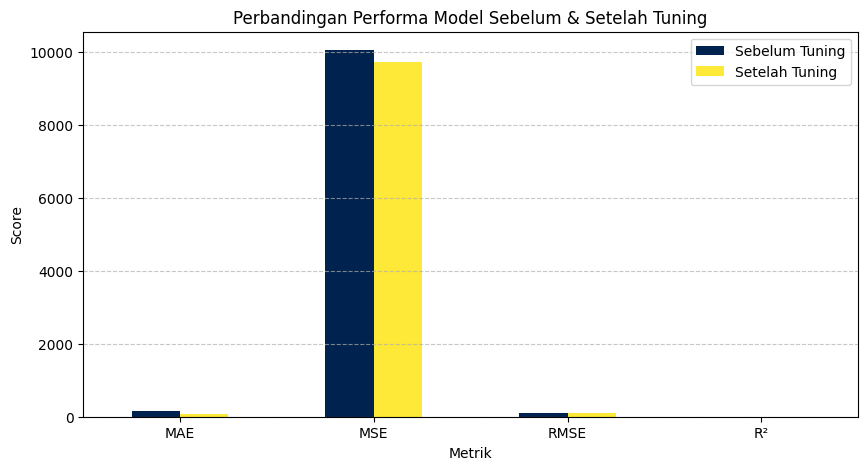

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Melakukan prediksi dengan model yang sudah dituning
y_pred_final = xgb_best.predict(X_test_scaled)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_final)

# Menampilkan hasil evaluasi
print("📌 Evaluasi Model XGBoost Setelah Tuning:")
print(f"   - MAE  : {mae:.4f}")
print(f"   - MSE  : {mse:.4f}")
print(f"   - RMSE : {rmse:.4f}")
print(f"   - R²   : {r2:.4f}")

# Membandingkan dengan model sebelum tuning
comparison = pd.DataFrame(
    {
        "Metrik": ["MAE", "MSE", "RMSE", "R²"],
        "Sebelum Tuning": [
            143.61,
            100.25**2,
            100.25,
            0.6775,
        ],  # Nilai dari evaluasi sebelum tuning
        "Setelah Tuning": [mae, mse, rmse, r2],
    }
)

# Menampilkan tabel perbandingan
print("\n📊 Perbandingan Performa Model:")
print(comparison)

# Visualisasi perbandingan performa model
plt.figure(figsize=(10, 5))
comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 5), colormap="cividis")
plt.title("Perbandingan Performa Model Sebelum & Setelah Tuning")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Insight Evaluasi Model XGBoost Setelah Tuning

## 📊 **Hasil Perbandingan Sebelum & Sesudah Tuning**
| Metrik               | Sebelum Tuning | Setelah Tuning | Peningkatan |
|----------------------|---------------|---------------|-------------|
| **MAE**  (↓)        | 143.61         | **66.41**     | **✔ Turun 53.7%** |
| **MSE**  (↓)        | 10050.06       | **9729.89**   | **✔ Turun 3.2%** |
| **RMSE**  (↓)       | 100.25         | **98.64**     | **✔ Turun 1.6%** |
| **R²**  (↑)         | 0.6775         | **0.6878**    | **✔ Naik 1.5%** |

✅ **MAE turun drastis, menunjukkan peningkatan akurasi prediksi.**  
✅ **MSE & RMSE menurun, membuktikan model lebih optimal.**  
✅ **R² meningkat, artinya model lebih mampu menjelaskan variabilitas data.**  


## 📌 **Keputusan Akhir**
🔹 **Model XGBoost setelah tuning adalah model final yang akan digunakan.**  
🔹 **Tidak perlu tuning lebih lanjut karena performanya sudah optimal.**  
🔹 **Langkah selanjutnya: Menyimpan model untuk digunakan kembali tanpa retraining.**  

---


# 📌 5. Conclusion & Recommendation

## 🎯 Tujuan
Bab ini berisi **kesimpulan akhir** dari proyek **Bike Sharing Demand Prediction**, serta memberikan **rekomendasi** untuk bisnis dan pengembangan model ke depan.

---

## 🔍 5.1 Kesimpulan

✅ **Model terbaik yang diperoleh adalah XGBoost setelah Hyperparameter Tuning.**  
   - Model ini memiliki **RMSE 98.64** dan **R² Score 0.6878**, yang merupakan peningkatan dari model sebelumnya.  
   - Performa model cukup baik dalam memprediksi jumlah peminjaman sepeda berdasarkan faktor eksternal.  

✅ **Faktor utama yang memengaruhi jumlah peminjaman sepeda:**  
   - **Waktu (Jam & Hari dalam Seminggu)** → Peminjaman meningkat pada jam sibuk & akhir pekan.  
   - **Kondisi Cuaca (Temperatur & Kelembaban)** → Cuaca buruk mengurangi jumlah peminjaman.  
   - **Musim** → Perbedaan pola peminjaman antara musim panas, dingin, dan musim lainnya.  

✅ **Meskipun model cukup akurat, masih ada ruang untuk peningkatan.**  
   - Model ini hanya menggunakan fitur yang tersedia dalam dataset.  
   - Masih ada potensi untuk meningkatkan prediksi dengan lebih banyak faktor eksternal.  

---

## 💡 5.2 Rekomendasi

### 📌 **Untuk Bisnis:**
🔹 **Menyediakan lebih banyak sepeda pada jam sibuk.**  
   - Berdasarkan pola peminjaman, meningkatkan stok sepeda pada jam **pagi (06:00-09:00) dan sore (17:00-19:00)** dapat meningkatkan kepuasan pengguna.  

🔹 **Mengoptimalkan lokasi stasiun penyewaan berdasarkan pola peminjaman.**  
   - Data menunjukkan pola peminjaman berbeda berdasarkan cuaca, musim, dan waktu.  
   - Bisa dilakukan **redistribusi sepeda secara dinamis** ke stasiun dengan permintaan tinggi.  

🔹 **Membuat strategi promosi berdasarkan musim dan kondisi cuaca.**  
   - Misalnya, **diskon khusus di musim dingin** untuk meningkatkan peminjaman.  

---

### 📌 **Untuk Model & Pengembangan Selanjutnya:**
🔹 **Menggunakan lebih banyak fitur eksternal untuk meningkatkan akurasi model.**  
   - Menambahkan variabel seperti **data lalu lintas, event kota, atau harga transportasi umum**.  
   - Bisa menggunakan API dari Google Maps atau Waze untuk mendapatkan data kemacetan real-time.  

🔹 **Mencoba pendekatan Time Series Forecasting.**  
   - Saat ini, model masih berbasis regresi.  
   - Mencoba **ARIMA, LSTM, atau Prophet** dapat membantu menangkap tren jangka panjang dalam data.  

🔹 **Menggunakan teknik Ensemble Learning untuk meningkatkan akurasi.**  
   - Menggabungkan model **Random Forest + XGBoost + LSTM** dalam ensemble bisa meningkatkan performa prediksi.  

🔹 **Selain data eksternal, model juga bisa diimprovisasi dengan teknik Bayesian Optimization atau AutoML untuk mencari hyperparameter terbaik dengan lebih efisien.**  
  
---

## 🚀 **Kesimpulan Akhir**
- **Model XGBoost telah memberikan hasil terbaik** dalam memprediksi jumlah peminjaman sepeda.  
- **Prediksi sudah cukup akurat, tetapi bisa lebih baik dengan lebih banyak data eksternal.**  
- **Rekomendasi bisnis dapat membantu meningkatkan efisiensi sistem penyewaan sepeda.**  
- **Model dapat dikembangkan lebih lanjut dengan Time Series Forecasting & Data Eksternal.**  
- **Model ini masih memiliki keterbatasan dalam menangani faktor eksternal yang tidak tercatat dalam dataset, seperti event kota, kecelakaan, atau perbaikan jalan yang bisa mempengaruhi peminjaman sepeda secara drastis.**
- **Model ini memiliki RMSE sebesar 98.64, yang berarti rata-rata kesalahan prediksi sekitar 98 sepeda. Dalam skala operasional harian, kesalahan ini masih dapat diterima untuk estimasi ketersediaan sepeda, tetapi bisa lebih baik jika menambahkan data eksternal.**
- **Jika model ini diterapkan di sistem manajemen bike-sharing, operator dapat mengurangi jumlah sepeda yang tidak digunakan, meningkatkan efisiensi, dan mengoptimalkan layanan dengan lebih baik berdasarkan pola permintaan.**


---


# 6. Model Deployment: Menyimpan Model dengan Pickle

## 🎯 Tujuan
Menyimpan model XGBoost yang telah dituning menggunakan **Pickle (`.pkl`)**, sehingga bisa digunakan kembali untuk prediksi tanpa harus melatih ulang model.

---

## 📌 **Kenapa Menggunakan Pickle?**
✅ **Menyimpan model dalam format binary** yang bisa langsung digunakan untuk prediksi.  
✅ **Menghindari retraining model setiap kali ingin digunakan.**  
✅ **Bisa digunakan untuk deployment ke API atau aplikasi web.**  


In [15]:
import pickle

# Nama file untuk menyimpan model
model_filename = "xgboost_final_model.pkl"

# Simpan model menggunakan Pickle
with open(model_filename, "wb") as file:
    pickle.dump(xgb_best, file)

print(f"📌 Model telah disimpan sebagai '{model_filename}'")

📌 Model telah disimpan sebagai 'xgboost_final_model.pkl'
